# 1. Unsupervised Clustering: Coffee Health Dataset
This notebook covers the full pipeline of an **unsupervised learning** task:  
data loading → preprocessing → outlier removal → encoding → clustering → evaluation → model selection.

## 1.1 Import Basic Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

 ## 1.2 Load Dataset

In [2]:
df_coffee = pd.read_csv(r".\synthetic_coffee_health_10000.csv")  # Load synthetic coffee health dataset
df_coffee.head()

,ID,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Health_Issues,Occupation,Smoking,Alcohol_Consumption
0,1,40,Male,Germany,3.5,328.1,7.5,Good,24.9,78,Low,14.5,NaN,Other,0,0
1,2,33,Male,Germany,1.0,94.1,6.2,Good,20.0,67,Low,11.0,NaN,Service,0,0
2,3,42,Male,Brazil,5.3,503.7,5.9,Fair,22.7,59,Medium,11.2,Mild,Office,0,0
3,4,53,Male,Germany,2.6,249.2,7.3,Good,24.7,71,Low,6.6,Mild,Other,0,0
4,5,32,Female,Spain,3.1,298.0,5.3,Fair,24.1,76,Medium,8.5,Mild,Student,0,1


In [3]:
df_coffee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       10000 non-null  int64  
 1   Age                      10000 non-null  int64  
 2   Gender                   10000 non-null  object 
 3   Country                  10000 non-null  object 
 4   Coffee_Intake            10000 non-null  float64
 5   Caffeine_mg              10000 non-null  float64
 6   Sleep_Hours              10000 non-null  float64
 7   Sleep_Quality            10000 non-null  object 
 8   BMI                      10000 non-null  float64
 9   Heart_Rate               10000 non-null  int64  
 10  Stress_Level             10000 non-null  object 
 11  Physical_Activity_Hours  10000 non-null  float64
 12  Health_Issues            4059 non-null   object 
 13  Occupation               10000 non-null  object 
 14  Smoking                

In [4]:
df_coffee.shape

(10000, 16)

In [5]:
df_coffee.duplicated().sum()

np.int64(0)

## 1.3 Drop Unnecessary Columns

In [6]:
df_coffee = df_coffee.drop("ID", axis=1)

## 1.4 Inspect Unique Values of Each Column

In [7]:
for col in df_coffee.columns:
    print(f"Column '{col}' has unique classes: {df_coffee[col].unique()}")


Column 'Age' has unique classes: [40 33 42 53 32 44 29 41 37 18 28 22 38 24 52 35 36 21 39 27 31 57 34 20
 19 43 26 47 30 46 51 25 45 64 48 61 23 50 67 80 62 60 56 54 49 59 58 71
 55 65 66 63 73 72 68 70 69 77 75]
Column 'Gender' has unique classes: ['Male' 'Female' 'Other']
Column 'Country' has unique classes: ['Germany' 'Brazil' 'Spain' 'Mexico' 'France' 'Canada' 'UK' 'Switzerland'
 'Netherlands' 'Italy' 'China' 'Japan' 'Belgium' 'Finland' 'Australia'
 'USA' 'Sweden' 'India' 'Norway' 'South Korea']
Column 'Coffee_Intake' has unique classes: [3.5 1.  5.3 2.6 3.1 3.4 2.7 4.5 1.7 4.  4.1 4.7 1.4 3.2 4.3 0.7 2.2 0.
 2.4 4.6 0.4 1.9 0.8 2.5 1.5 2.8 4.4 3.8 2.  3.3 2.1 3.6 1.6 1.1 0.9 4.9
 0.1 5.4 1.3 0.6 1.8 2.9 4.2 2.3 3.9 1.2 7.6 0.2 7.1 5.2 0.5 3.7 5.  6.2
 3.  4.8 5.1 7.3 5.8 5.9 6.1 5.5 5.7 6.4 0.3 5.6 6.7 6.  6.5 6.3 8.2 7.2
 7.  6.6 7.8 6.8 7.7 6.9]
Column 'Caffeine_mg' has unique classes: [328.1  94.1 503.7 ... 460.2 509.1  59.1]
Column 'Sleep_Hours' has unique classes: [ 7.5  6.2

# 2. Outlier Detection

 We use **IsolationForest** to detect and filter out outliers based on integer columns.


In [8]:
from sklearn.ensemble import IsolationForest

iso_forest = IsolationForest(contamination=0.2, random_state=42)
int_columns = df_coffee.select_dtypes(include=['int64']).columns
df_coffee['Outlier_Flag'] = iso_forest.fit_predict(df_coffee[int_columns])


In [9]:
# Separate normal data from outliers
df_no_outliers = df_coffee[df_coffee['Outlier_Flag'] == 1]
df_outliers_only = df_coffee[df_coffee['Outlier_Flag'] == -1]
df_no_outliers.head()

,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Health_Issues,Occupation,Smoking,Alcohol_Consumption,Outlier_Flag
0,40,Male,Germany,3.5,328.1,7.5,Good,24.9,78,Low,14.5,NaN,Other,0,0,1
1,33,Male,Germany,1.0,94.1,6.2,Good,20.0,67,Low,11.0,NaN,Service,0,0,1
2,42,Male,Brazil,5.3,503.7,5.9,Fair,22.7,59,Medium,11.2,Mild,Office,0,0,1
3,53,Male,Germany,2.6,249.2,7.3,Good,24.7,71,Low,6.6,Mild,Other,0,0,1
4,32,Female,Spain,3.1,298.0,5.3,Fair,24.1,76,Medium,8.5,Mild,Student,0,1,1


In [10]:
df_no_outliers.shape

(8001, 16)

In [11]:
# Outlier statistics
print("Descriptive statistics for outliers:")
print(df_outliers_only.describe())

Descriptive statistics for outliers:
               Age  Coffee_Intake  Caffeine_mg  Sleep_Hours          BMI  \
count  1999.000000    1999.000000  1999.000000  1999.000000  1999.000000   
mean     37.088044       2.518959   239.323312     6.672536    24.092146   
std      15.113062       1.457718   138.447819     1.206705     3.880303   
min      18.000000       0.000000     0.000000     3.000000    15.000000   
25%      23.000000       1.500000   137.900000     5.800000    21.400000   
50%      36.000000       2.500000   239.000000     6.700000    24.000000   
75%      51.000000       3.500000   334.850000     7.500000    26.700000   
max      80.000000       7.600000   723.900000    10.000000    38.200000   

        Heart_Rate  Physical_Activity_Hours      Smoking  Alcohol_Consumption  \
count  1999.000000              1999.000000  1999.000000          1999.000000   
mean     71.247124                 7.411656     0.634317             0.534267   
std      13.741244                 

In [12]:
outlier_ratio = (len(df_outliers_only) / len(df_coffee)) * 100
print(f"\nNumber of outliers: {len(df_outliers_only)}")
print(f"Total samples: {len(df_coffee)}")
print(f"Percentage of outliers: {outlier_ratio:.2f}%")


Number of outliers: 1999
Total samples: 10000
Percentage of outliers: 19.99%


C:\Users\p-fr\AppData\Local\Temp\ipykernel_10476\1804440665.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Outlier_Flag', data=df_coffee, palette=['red', 'green'])


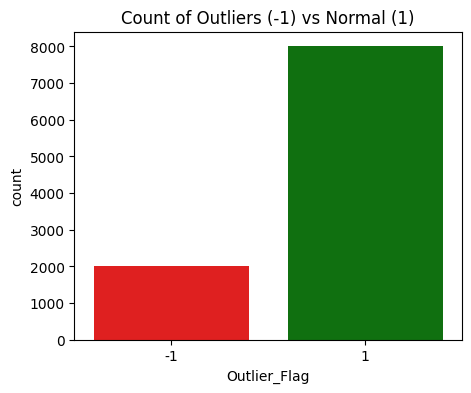

In [13]:
# Plot outlier counts
plt.figure(figsize=(5, 4))
sns.countplot(x='Outlier_Flag', data=df_coffee, palette=['red', 'green'])
plt.title('Count of Outliers (-1) vs Normal (1)')
plt.show()

# 3. Encoding Categorical Variables

In [14]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

categorical_columns = df_no_outliers.select_dtypes(include=['object']).columns
for col in categorical_columns:
    df_no_outliers[col] = label_encoder.fit_transform(df_no_outliers[col])

df_no_outliers.head()


C:\Users\p-fr\AppData\Local\Temp\ipykernel_10476\3147968840.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers[col] = label_encoder.fit_transform(df_no_outliers[col])
C:\Users\p-fr\AppData\Local\Temp\ipykernel_10476\3147968840.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers[col] = label_encoder.fit_transform(df_no_outliers[col])
C:\Users\p-fr\AppData\Local\Temp\ipykernel_10476\3147968840.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Health_Issues,Occupation,Smoking,Alcohol_Consumption,Outlier_Flag
0,40,1,7,3.5,328.1,7.5,2,24.9,78,1,14.5,3,2,0,0,1
1,33,1,7,1.0,94.1,6.2,2,20.0,67,1,11.0,3,3,0,0,1
2,42,1,2,5.3,503.7,5.9,1,22.7,59,2,11.2,0,1,0,0,1
3,53,1,7,2.6,249.2,7.3,2,24.7,71,1,6.6,0,2,0,0,1
4,32,0,15,3.1,298.0,5.3,1,24.1,76,2,8.5,0,4,0,1,1


In [15]:
# Remove Outlier Flag from DataFrame
df_features = df_no_outliers.drop("Outlier_Flag", axis=1)
df_features.shape

(8001, 15)

 ## 3.1 Plot Histograms for All Columns

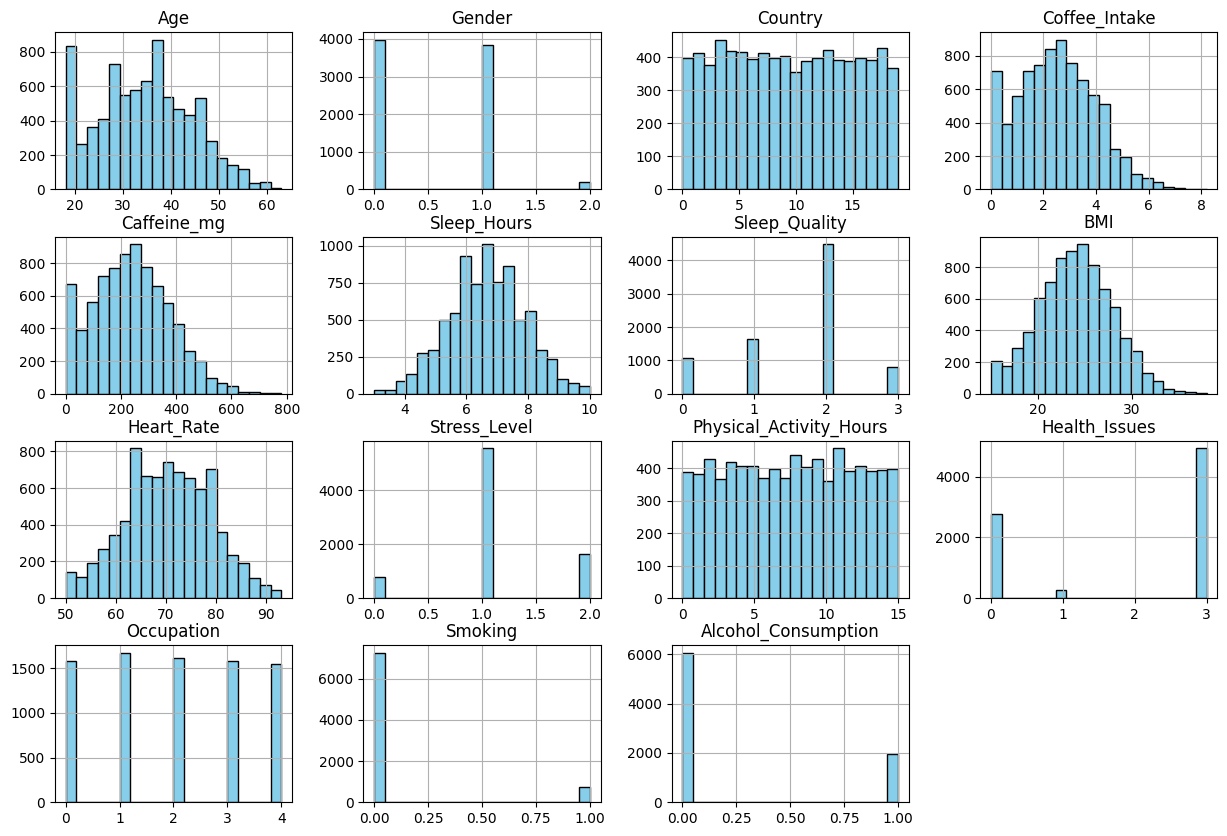

In [16]:
df_features.hist(bins=20, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.show()

# 4. K-Means Clustering

In [17]:
from sklearn.cluster import KMeans

kmeans_init = KMeans(init="k-means++", n_clusters=4, n_init=12)
kmeans_init.fit(df_features)

cluster_labels = kmeans_init.labels_  # Cluster labels for each row
cluster_centers = kmeans_init.cluster_centers_  # Coordinates of cluster centers


 # 5. Standard Scaling

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_features)


In [19]:
# Fit KMeans with chosen number of clusters
k = 4  # could be optimized with elbow method
kmeans_final = KMeans(n_clusters=k, random_state=42)
df_features['Cluster'] = kmeans_final.fit_predict(data_scaled)


# 6. Choosing Best k with Silhouette Score

In [20]:
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

silhouette_scores = []

In [21]:
def compute_silhouette(k):
    """Train KMeans with a given k and compute silhouette score."""
    km = KMeans(n_clusters=k, random_state=42)
    df_features['Cluster'] = km.fit_predict(data_scaled)
    return silhouette_score(data_scaled, df_features['Cluster'])

for i in range(3, 20):
    silhouette_scores.append(compute_silhouette(i))

max(silhouette_scores)


np.float64(0.16116005089456006)

In [22]:
silhouette_scores.index(0.16116005089456006)

1

## 6.1 Visualizing Clusters (3 Clusters Example)

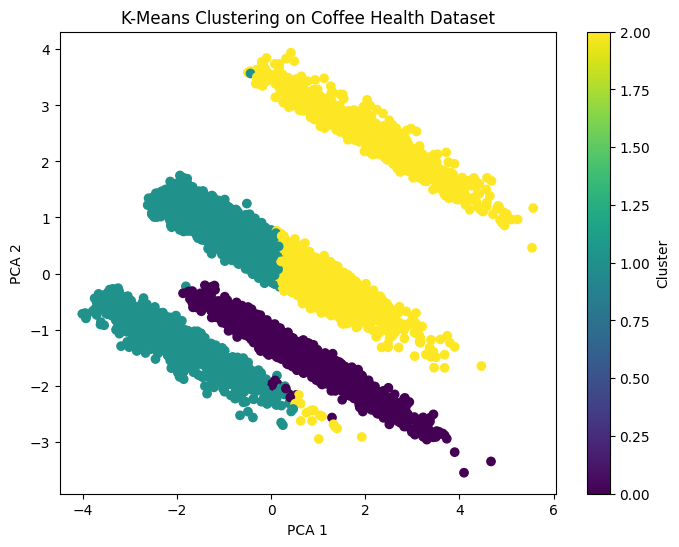

In [23]:
sil_score_3 = compute_silhouette(3)

pca = PCA(n_components=2)
pca_data = pca.fit_transform(data_scaled)
plt.figure(figsize=(8, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=df_features['Cluster'], cmap='viridis')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('K-Means Clustering on Coffee Health Dataset')
plt.colorbar(label='Cluster')
plt.show()


# 7. Class Distribution After Clustering

C:\Users\p-fr\AppData\Local\Temp\ipykernel_10476\2443674918.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='viridis')


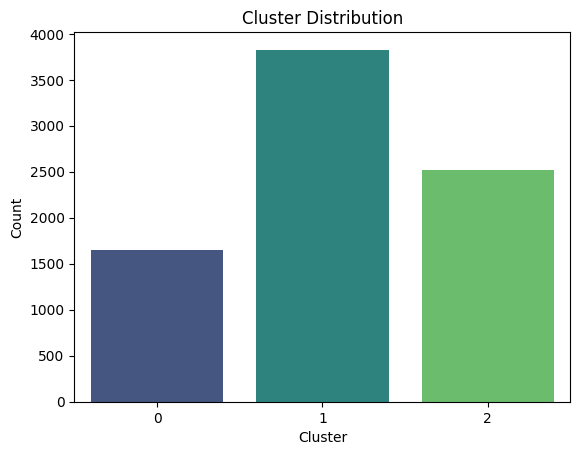

In [24]:
cluster_counts = df_features['Cluster'].value_counts()
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='viridis')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.title('Cluster Distribution')
plt.show()


# 8. Train-Test Split

In [25]:
from sklearn.model_selection import train_test_split

X = df_features.drop(["Cluster"], axis=1)
y = df_features["Cluster"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 9. Standard Scaling

In [26]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# 10. Handling Class Imbalance with SMOTE

In [27]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)


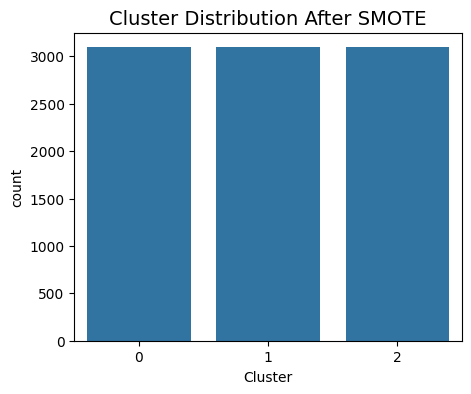

In [28]:
# Visualize new class distribution
plt.figure(figsize=(5, 4))
sns.countplot(x=y_train_balanced)
plt.title('Cluster Distribution After SMOTE', fontsize=14)
plt.show()

In [29]:
print(y_train_balanced.value_counts())


Cluster
2    3094
1    3094
0    3094
Name: count, dtype: int64


 # 11. Random Forest: Feature Importance

                    Feature  Importance
5               Sleep_Hours    0.206799
9              Stress_Level    0.198596
4               Caffeine_mg    0.168071
6             Sleep_Quality    0.145163
3             Coffee_Intake    0.144027
11            Health_Issues    0.084216
7                       BMI    0.012167
0                       Age    0.011460
8                Heart_Rate    0.008211
10  Physical_Activity_Hours    0.007788
2                   Country    0.006070
12               Occupation    0.003874
1                    Gender    0.001821
14      Alcohol_Consumption    0.001101
13                  Smoking    0.000635


C:\Users\p-fr\AppData\Local\Temp\ipykernel_10476\1451837393.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feat_df, x='Importance', y='Feature', palette='viridis')


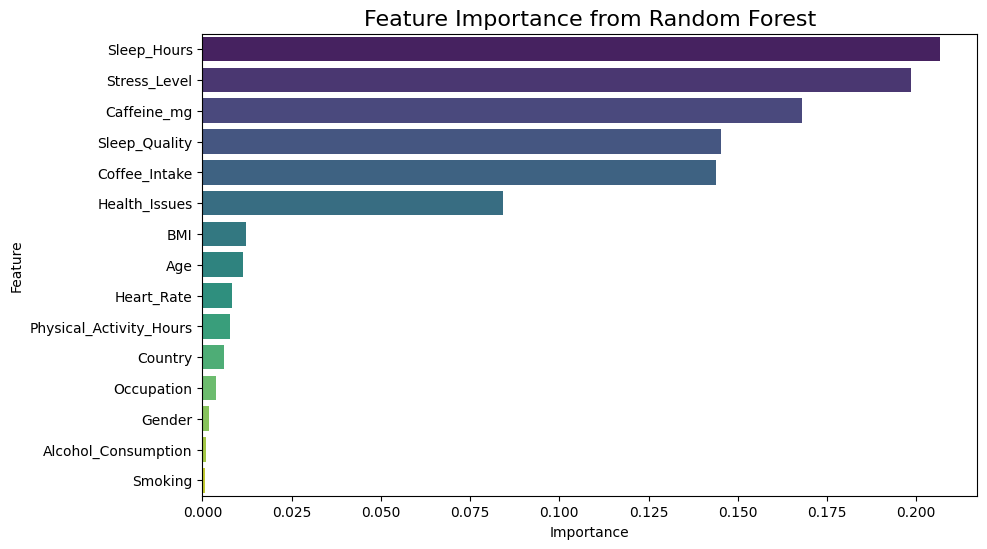

In [30]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train_scaled, y_train)

feature_importances = rf_model.feature_importances_
feat_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print(feat_df)

plt.figure(figsize=(10, 6))
sns.barplot(data=feat_df, x='Importance', y='Feature', palette='viridis')
plt.title('Feature Importance from Random Forest', fontsize=16)
plt.show()


# 12. Model Training and Hyperparameter Tuning (RandomForest, XGBoost, GradientBoosting)

In [31]:
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [32]:
models_and_params = {
    "RandomForest": (
        RandomForestClassifier(random_state=42),
        {"n_estimators": [100, 200], "max_depth": [None, 10, 20]}
    ),
    "XGBoost": (
        XGBClassifier(eval_metric='logloss', random_state=42, n_jobs=-1),
        {"n_estimators": [100, 200], "max_depth": [3, 6], "learning_rate": [0.05, 0.1]}
    ),
    "GradientBoosting": (
        GradientBoostingClassifier(random_state=42),
        {"n_estimators": [100, 200], "learning_rate": [0.05, 0.1]}
    )
}

In [33]:
results = []
for model_name, (model, params) in models_and_params.items():
    print(f"🔍 Tuning {model_name} ...")
    grid = GridSearchCV(model, params, cv=3, scoring="accuracy", n_jobs=-1)
    grid.fit(X_train_balanced, y_train_balanced)
    y_pred = grid.best_estimator_.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    results.append({
        "Model": model_name,
        "Best Params": grid.best_params_,
        "Test Accuracy": acc
    })


🔍 Tuning RandomForest ...
🔍 Tuning XGBoost ...
🔍 Tuning GradientBoosting ...


In [34]:
results_df = pd.DataFrame(results).sort_values(by="Test Accuracy", ascending=False)
print(results_df)

              Model                                        Best Params  \
2  GradientBoosting        {'learning_rate': 0.1, 'n_estimators': 200}   
1           XGBoost  {'learning_rate': 0.1, 'max_depth': 3, 'n_esti...   
0      RandomForest           {'max_depth': None, 'n_estimators': 200}   

   Test Accuracy  
2       0.991255  
1       0.989382  
0       0.983136  


C:\Users\p-fr\AppData\Local\Temp\ipykernel_10476\892560412.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x="Test Accuracy", y="Model", palette="viridis")


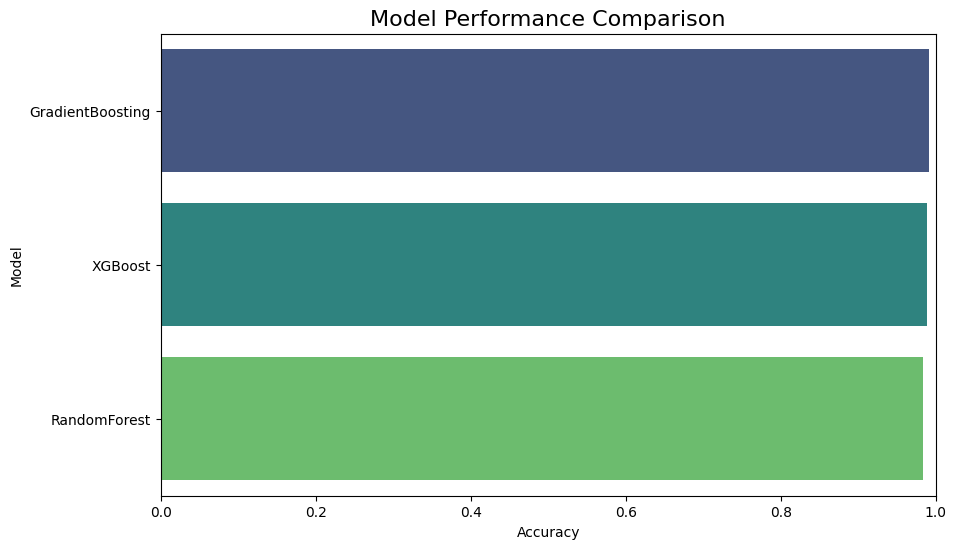

In [35]:
plt.figure(figsize=(10, 6))
sns.barplot(data=results_df, x="Test Accuracy", y="Model", palette="viridis")
plt.title("Model Performance Comparison", fontsize=16)
plt.xlabel("Accuracy")
plt.xlim(0, 1)
plt.show()

# 13. Final RandomForest Model

In [36]:
best_rf_params = None
for res in results:
    if res["Model"] == "RandomForest":
        best_rf_params = res["Best Params"]
        break

if best_rf_params:
    final_rf = RandomForestClassifier(**best_rf_params, random_state=42)
    final_rf.fit(X_train_balanced, y_train_balanced)
    y_pred_final_rf = final_rf.predict(X_test_scaled)
    print("🎯 RandomForest Test Accuracy:", accuracy_score(y_test, y_pred_final_rf))
    print("🔮 Sample Predictions:", y_pred_final_rf[:5])
    print("✅ True Labels:", y_test[:5].values)
else:
    print("❌ No RandomForest parameters found!")

🎯 RandomForest Test Accuracy: 0.9831355402873204
🔮 Sample Predictions: [1 1 1 0 1]
✅ True Labels: [1 1 1 0 1]


# part 2 : work with ANN

This part has been written from scratch with the goal of demonstrating a full unsupervised clustering workflow.
The design uses the K-Means clustering algorithm, feature encoding, scaling, PCA visualization, and evaluation using the Silhouette Score.
Although SMOTE could have been used to handle class imbalance, it was intentionally avoided to reduce the risk of overfitting.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       10000 non-null  int64  
 1   Age                      10000 non-null  int64  
 2   Gender                   10000 non-null  object 
 3   Country                  10000 non-null  object 
 4   Coffee_Intake            10000 non-null  float64
 5   Caffeine_mg              10000 non-null  float64
 6   Sleep_Hours              10000 non-null  float64
 7   Sleep_Quality            10000 non-null  object 
 8   BMI                      10000 non-null  float64
 9   Heart_Rate               10000 non-null  int64  
 10  Stress_Level             10000 non-null  object 
 11  Physical_Activity_Hours  10000 non-null  float64
 12  Health_Issues            4059 non-null   object 
 13  Occupation               10000 non-null  object 
 14  Smoking                

C:\Users\p-fr\AppData\Local\Temp\ipykernel_10476\3057234745.py:87: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='outlier', data=df, palette=['red', 'green'])


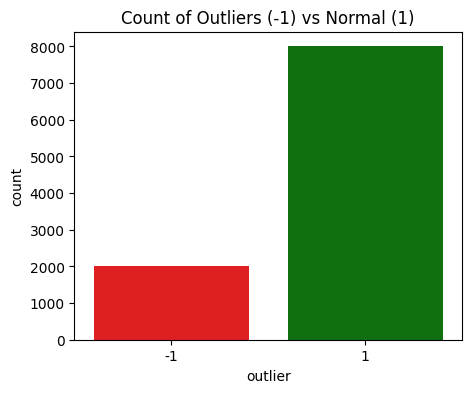

In [38]:
# ## 1. Import Basic Libraries

# %%
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# %% [markdown]
# ## 2. Load Dataset

# %%
# Load the synthetic coffee health dataset from CSV file
df = pd.read_csv(r"./synthetic_coffee_health_10000.csv")

# %% [markdown]
# ## 3. Initial Data Exploration

# %%
# Display first few rows
df.head()

# %%
# Show dataframe info (column names, non-null counts, datatypes)
df.info()

# %%
# Show dataframe shape (rows, columns)
df.shape

# %%
# Count duplicate rows
df.duplicated().sum()

# %% [markdown]
# ## 4. Drop Unnecessary Columns

# %%
# Remove ID column which is not useful for clustering
df = df.drop("ID", axis=1)

# %% [markdown]
# ## 5. Display Unique Classes per Column

# %%
for column in df.columns:
    print(f"{column} has these classes: {df[column].unique()}")

# %% [markdown]
# ## 6. Detect and Remove Outliers with Isolation Forest

# %%
from sklearn.ensemble import IsolationForest

# Select only integer columns for Isolation Forest
int_columns = df.select_dtypes(include=['int64']).columns

# Fit Isolation Forest for outlier detection
iso_forest = IsolationForest(contamination=0.2, random_state=42)
df['outlier'] = iso_forest.fit_predict(df[int_columns])

# Subset datasets based on outlier detection
# -1 = Outlier, 1 = Normal
filtered_df = df[df['outlier'] == 1]
outliers_df = df[df['outlier'] == -1]

filtered_df.head()

# %%
# Show size after removing outliers
filtered_df.shape

# %% [markdown]
# ### Outlier Statistics

# %%
print("Descriptive statistics for outliers:")
print(outliers_df.describe())

outlier_percentage = (len(outliers_df) / len(df)) * 100
print(f"\nNumber of outliers: {len(outliers_df)}")
print(f"Total samples: {len(df)}")
print(f"Percentage of outliers: {outlier_percentage:.2f}%")

# Plot outlier vs normal distribution
plt.figure(figsize=(5,4))
sns.countplot(x='outlier', data=df, palette=['red', 'green'])
plt.title('Count of Outliers (-1) vs Normal (1)')
plt.show()


In [39]:
# ## 7. Label Encoding for Categorical Features

# %%
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
categorical_columns = filtered_df.select_dtypes(include=['object']).columns

# Encode each categorical column into numeric
for col in categorical_columns:
    filtered_df[col] = encoder.fit_transform(filtered_df[col])

filtered_df.head()

# %%
# Drop outlier marker column (no longer needed)
filtered_df = filtered_df.drop("outlier", axis=1)
filtered_df.shape

# %% [markdown]

C:\Users\p-fr\AppData\Local\Temp\ipykernel_10476\4251228228.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df[col] = encoder.fit_transform(filtered_df[col])
C:\Users\p-fr\AppData\Local\Temp\ipykernel_10476\4251228228.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df[col] = encoder.fit_transform(filtered_df[col])
C:\Users\p-fr\AppData\Local\Temp\ipykernel_10476\4251228228.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using

(8001, 15)

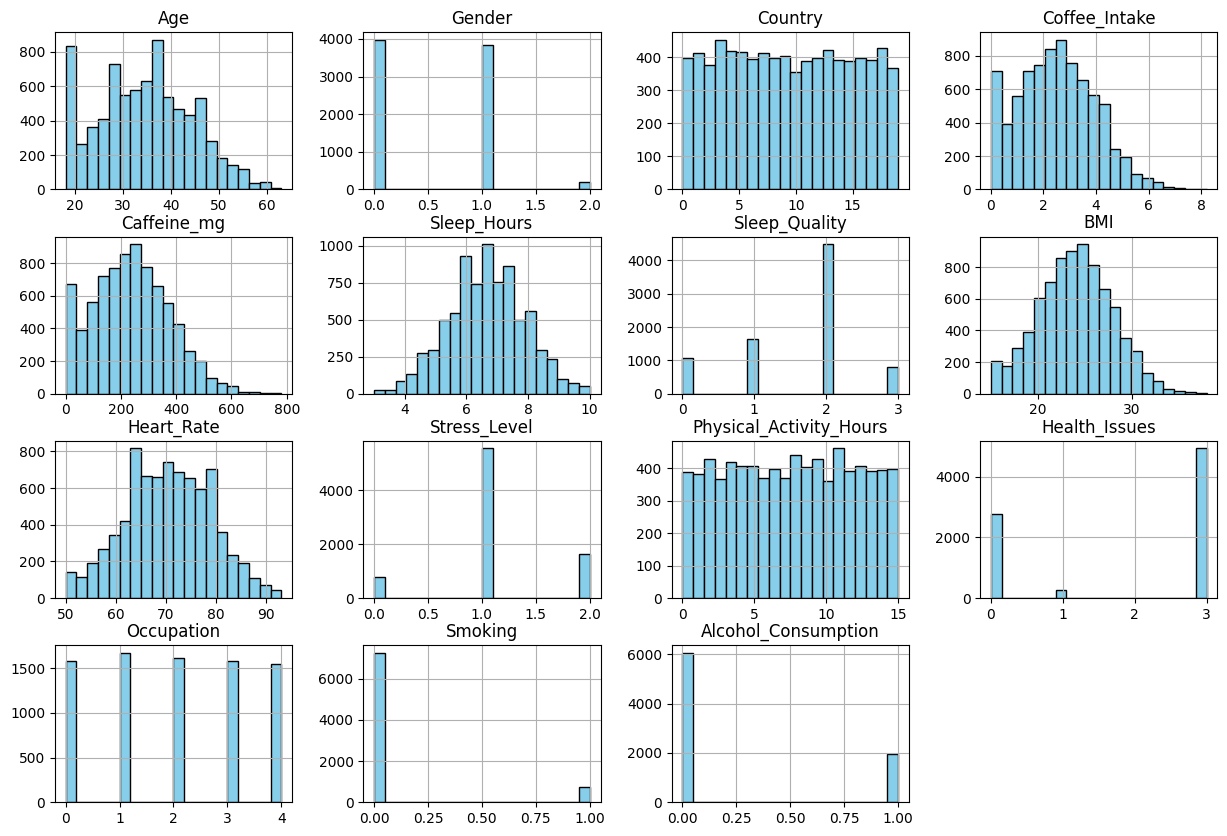

In [40]:
# ## 8. Plot Histograms of All Features

# %%
filtered_df.hist(bins=20, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.show()

# %% [markdown]
# ## 9. Apply K-Means Clustering

# %%
from sklearn.cluster import KMeans

kmeans_base = KMeans(init="k-means++", n_clusters=4, n_init=12)
kmeans_base.fit(filtered_df)
kmeans_labels = kmeans_base.labels_
kmeans_centers = kmeans_base.cluster_centers_

# %% [markdown]
# ## 10. Standardize Features before Clustering

# %%
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(filtered_df)

# %%
# Assign clusters with k=4 (could also use Elbow method to decide)
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
filtered_df['Cluster'] = kmeans.fit_predict(scaled_data)


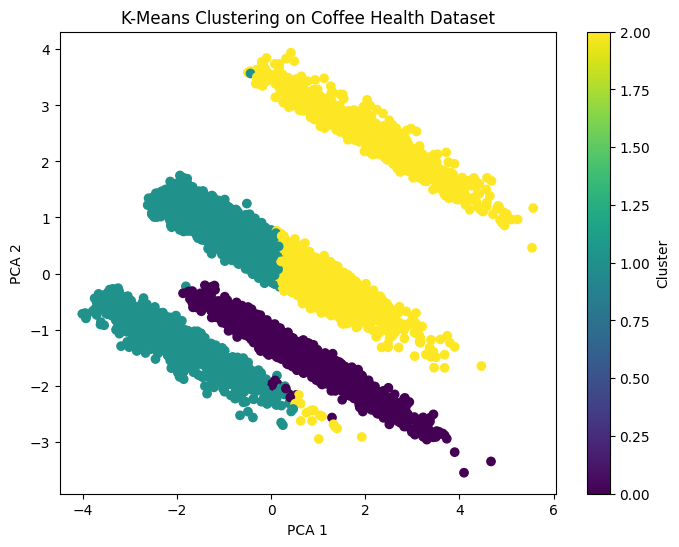

In [41]:
# ## 11. Define Function to Select Best k using Silhouette Score

# %%
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

silhouette_scores = []

def get_silhouette_for_k(num_clusters):
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    filtered_df['Cluster'] = kmeans.fit_predict(scaled_data)
    return silhouette_score(scaled_data, filtered_df['Cluster'])

# %%
# Search in range of possible k values
for k_val in range(3, 20):
    sil_val = get_silhouette_for_k(k_val)
    silhouette_scores.append(sil_val)

max(silhouette_scores)

# %% [markdown]
# ## 12. Visualization with PCA for k=3

# %%
get_silhouette_for_k(3)

pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(scaled_data)
plt.figure(figsize=(8, 6))
plt.scatter(pca_transformed[:, 0], pca_transformed[:, 1], c=filtered_df['Cluster'], cmap='viridis')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('K-Means Clustering on Coffee Health Dataset')
plt.colorbar(label='Cluster')
plt.show()

C:\Users\p-fr\AppData\Local\Temp\ipykernel_10476\935383689.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')


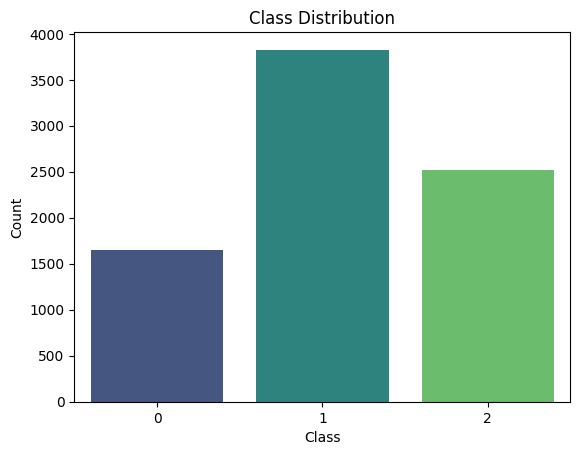

In [42]:
# ## 13. Class Distribution in Clusters

# %%
class_counts = filtered_df['Cluster'].value_counts()
sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

# %% [markdown]
# ## 14. Train/Test Split

# %%
from sklearn.model_selection import train_test_split

X = filtered_df.drop("Cluster", axis=1)
y = filtered_df["Cluster"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# %% [markdown]
# ## 15. Standardize Train and Test Data

# %%
scaler_tt = StandardScaler()
X_train_scaled = scaler_tt.fit_transform(X_train)
X_test_scaled = scaler_tt.transform(X_test)

# %%
# No SMOTE applied intentionally to avoid overfitting
X_train_final, y_train_final = X_train_scaled, y_train

# make a neural network ANN:

In this section, multiple experiments were conducted involving various neural network architectures and different combinations of layers. However, to maintain clarity and avoid unnecessary clutter in the description, the detailed results of each individual test have been omitted. Instead, the discussion here is focused solely on presenting the final outcome.

It is worth noting that the result presented here represents the best performance I was able to achieve during the course of this project. While these findings mark a personal milestone in my work, I sincerely hope that other researchers and developers who examine this code will be able to build upon it and achieve even better results in the future.

In [43]:

from sklearn.decomposition import PCA
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

def build_custom_nn(input_dim, layers_config, dropout_rate=0.5, activation='relu', output_units=3, output_activation='sigmoid'):
    """
    Build a neural network model with given configuration.

    Parameters:
        input_dim (int): Number of features
        layers_config (list): List of neurons per hidden layer
        dropout_rate (float): Dropout rate between layers
        activation (str): Hidden layer activation function
        output_units (int): Output neurons
        output_activation (str): Output activation (sigmoid for binary)
    """
    model = Sequential()

    # First layer with input dimension
    model.add(Dense(layers_config[0], activation=activation, input_dim=input_dim))
    model.add(Dropout(dropout_rate))

    # Additional hidden layers with dropout
    for units in layers_config[1:]:
        model.add(Dense(units, activation=activation))
        model.add(Dropout(dropout_rate))

    # Output layer
    model.add(Dense(output_units, activation=output_activation))

    # Compile model
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    
    return model


c:\Users\p-fr\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.4402 - loss: 1.1125 - val_accuracy: 0.5023 - val_loss: 1.0266
Epoch 2/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5361 - loss: 0.9926 - val_accuracy: 0.6328 - val_loss: 0.8660
Epoch 3/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6326 - loss: 0.8511 - val_accuracy: 0.9477 - val_loss: 0.5127
Epoch 4/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7346 - loss: 0.6752 - val_accuracy: 0.9875 - val_loss: 0.2444
Epoch 5/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8059 - loss: 0.5160 - val_accuracy: 0.9812 - val_loss: 0.1119
Epoch 6/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8361 - loss: 0.4505 - val_accuracy: 0.9859 - val_loss: 0.0844
Epoch 7/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8555 - loss: 0.3866 - val_accuracy: 0.9867 - val_loss: 0.0581
Epoch 8/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8664 - loss: 0.3605 - val_accuracy: 0.

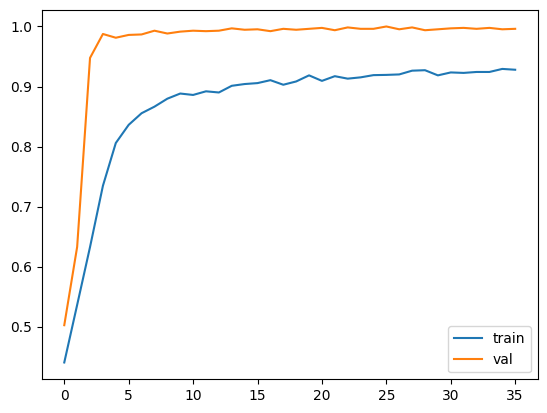

In [46]:

from tensorflow.keras.callbacks import ReduceLROnPlateau

early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Build model with specific layer sizes
model = build_custom_nn(input_dim=X_train_final.shape[1], layers_config=[64,32,16,8], dropout_rate=0.5)

# Train model with validation split
history = model.fit(X_train_final, y_train_final, epochs=50, callbacks=[early_stop], verbose=1, validation_split=0.2)

# Plot training/validation accuracy
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.legend()
plt.show()

In [48]:
test_dataset = (
    tf.data.Dataset.from_tensor_slices((X_test_scaled, y_test))
    .batch(16)
    .prefetch(tf.data.AUTOTUNE)
)

In [49]:
loss, acc = model.evaluate(test_dataset)
print(f"Test Accuracy: {acc:.4f}")

101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9925 - loss: 0.0248
Test Accuracy: 0.9925
